In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,NaN,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  99995 non-null   float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      99997 non-null   object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Preprocessing**

In [5]:
df.isna().sum()

gender                 0
age                    5
hypertension           0
heart_disease          0
smoking_history        3
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df['age'].fillna(inplace=True, value=df['age'].mean())

In [7]:
df['smoking_history'].fillna(inplace=True, value=df['smoking_history'].mode())

In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        2
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885720,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516036,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


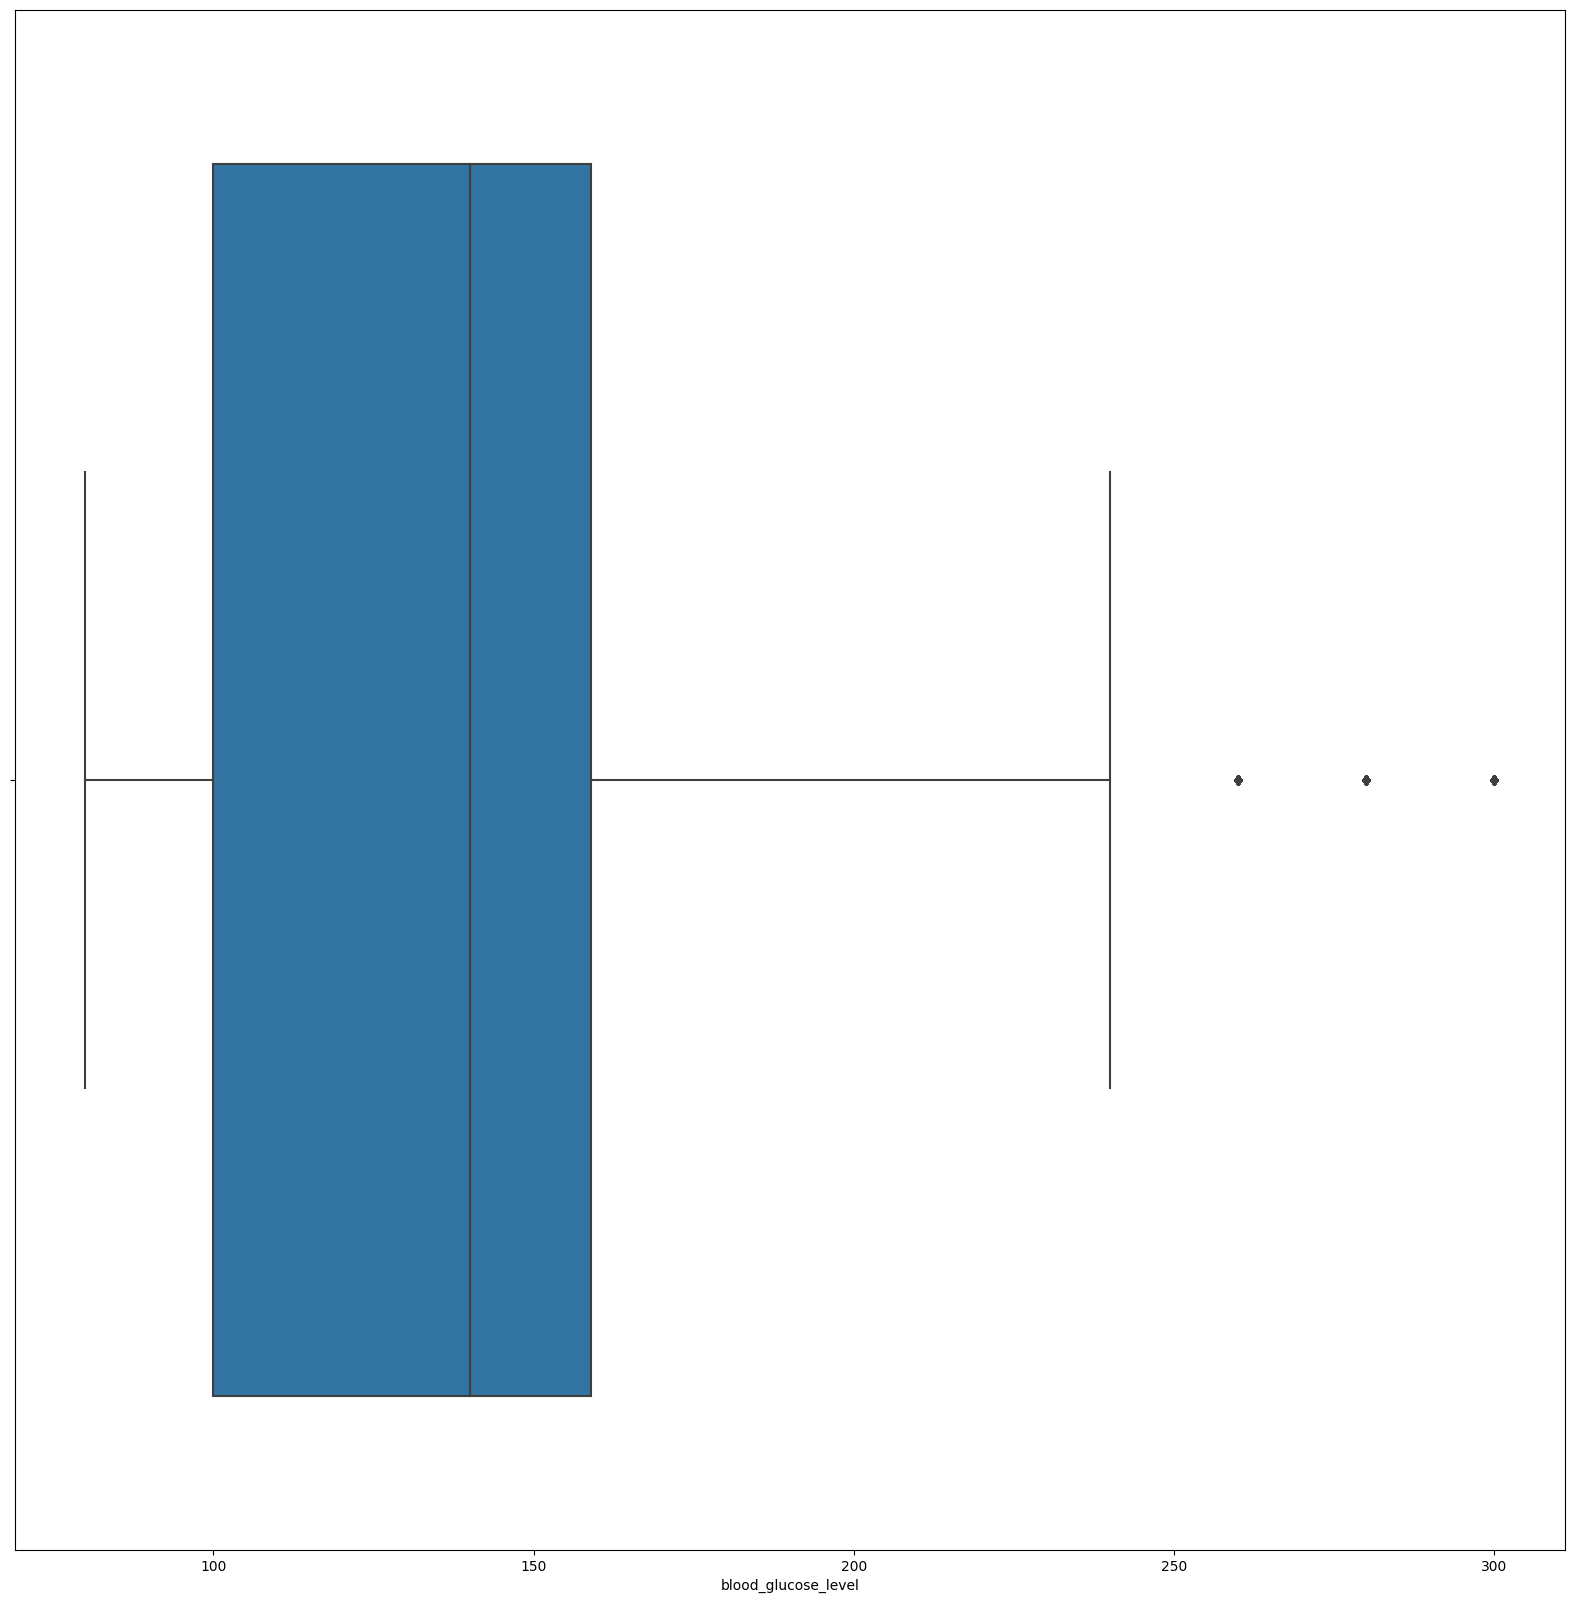

In [10]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df['blood_glucose_level'])

plt.show()

In [11]:
df.shape

(100000, 9)

In [12]:
def remove_outliers(df, columns, z_threshold=3, iqr_threshold=1.5):
    # Z-score method
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    z_outliers = (z_scores > z_threshold).any(axis=1)
    
    # IQR method
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)
    iqr = q3 - q1
    iqr_outliers = ((df[columns] < (q1 - iqr_threshold * iqr)) | (df[columns] > (q3 + iqr_threshold * iqr))).any(axis=1)

    all_outliers = z_outliers | iqr_outliers
    
    # Remove outliers from the DataFrame
    df_no_outliers = df[~all_outliers]
    
    return df_no_outliers

df = remove_outliers(df, columns=['blood_glucose_level'])

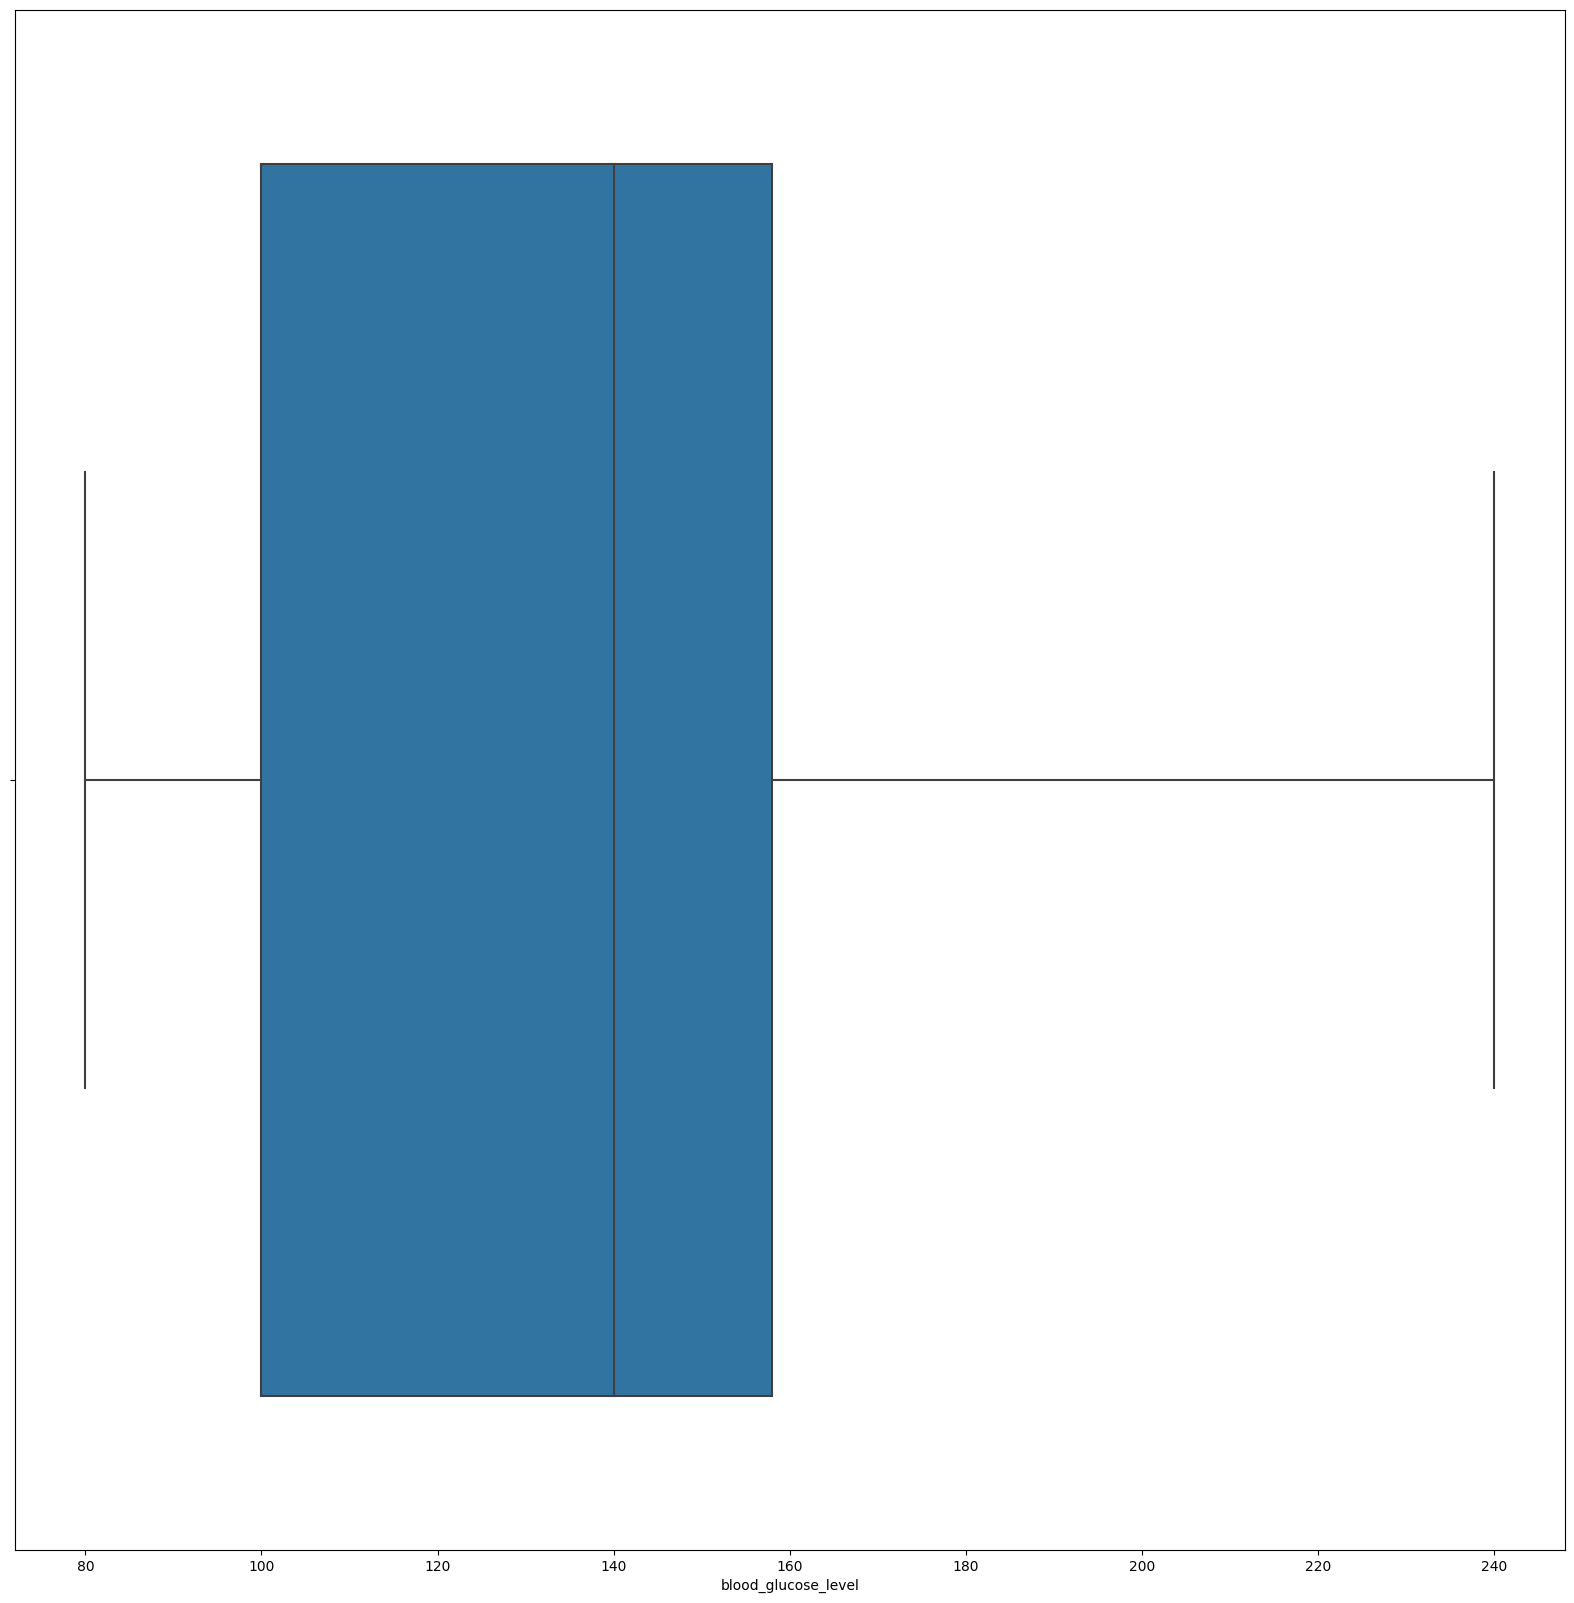

In [13]:
plt.figure(figsize=(20,20))
sns.boxplot(x=df['blood_glucose_level'])

plt.show()

In [14]:
df.shape

(97962, 9)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,No Info,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Data analysis**

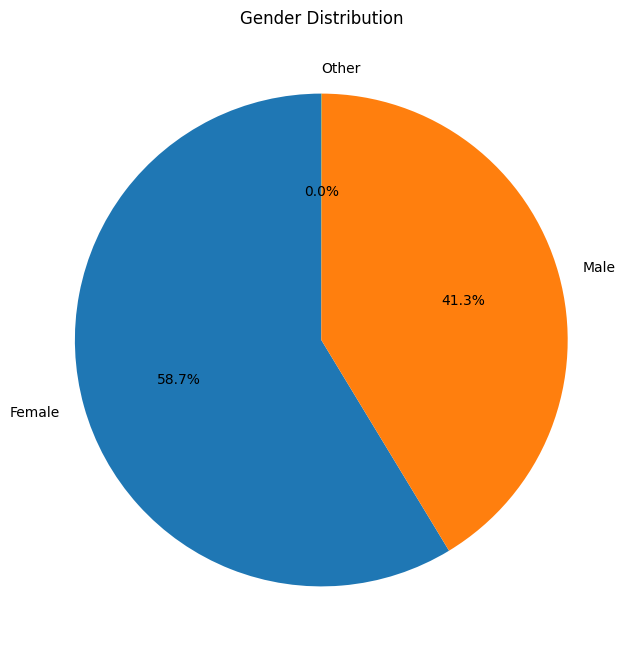

In [16]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust the size as needed
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show() 

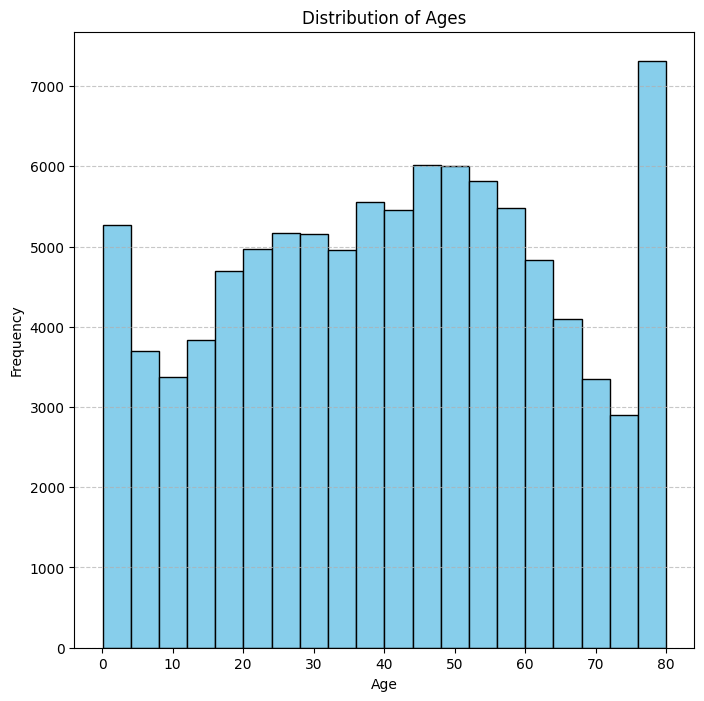

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 8))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


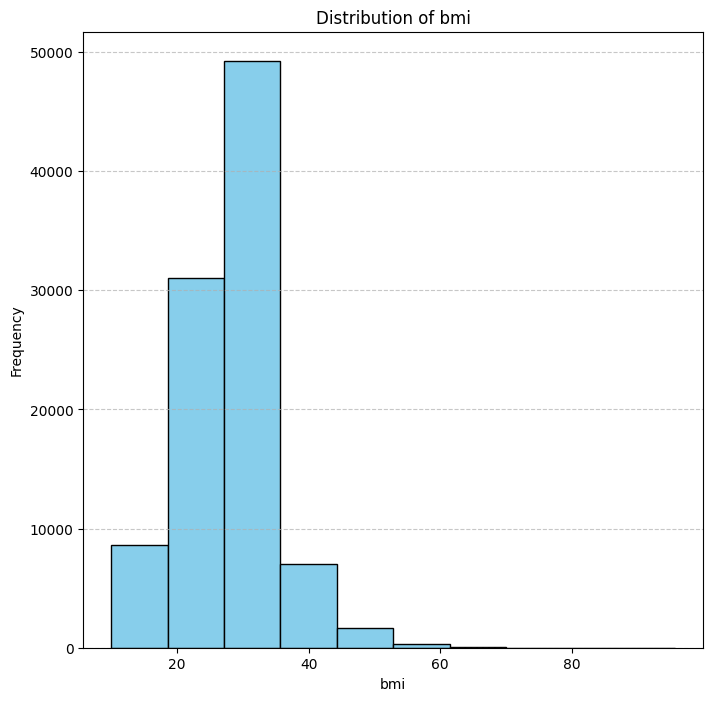

In [18]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 8))
plt.hist(df['bmi'], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


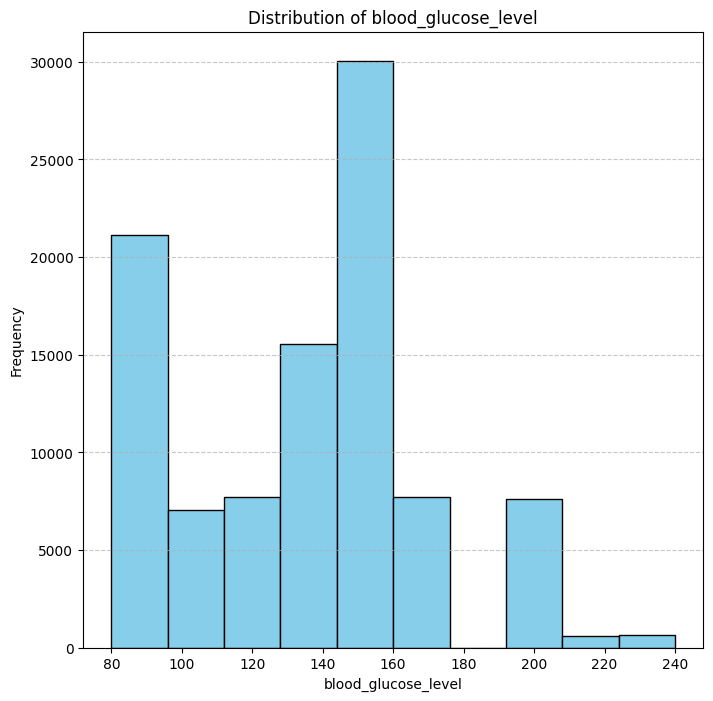

In [19]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 8))
plt.hist(df['blood_glucose_level'], bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of blood_glucose_level')
plt.xlabel('blood_glucose_level')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], prefix=['gender', 'smoking'])
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,True,False,False,False,False,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,True,False,False,True,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,False,True,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,True,False,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,True,False,False,False,False,False,False,True,False


In [21]:
X = df.drop('diabetes', axis=1) 
y = df['diabetes'] 

**Data splitting**

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((73471, 15), (24491, 15), (73471,), (24491,))

**Modeling**

In [24]:
classification = LogisticRegression()

In [25]:
classification.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = classification.predict(X_test)

In [27]:
print(y_pred)

[0 0 0 ... 0 0 0]


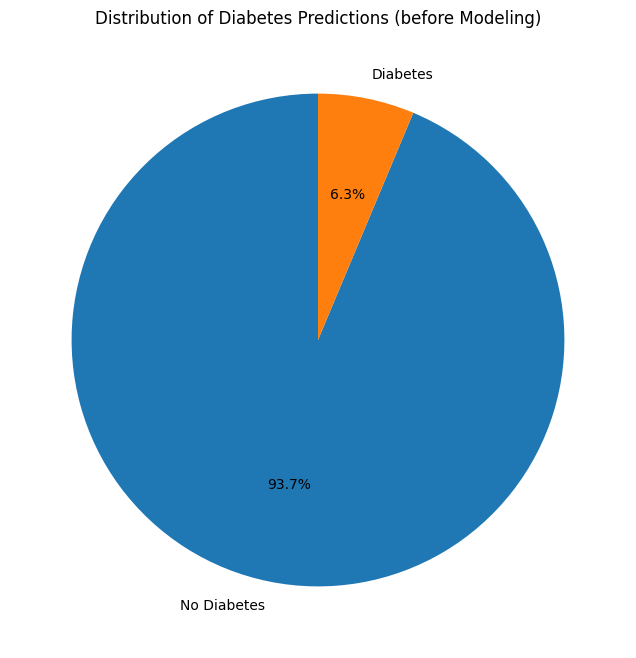

In [28]:
f_result = pd.DataFrame({'True': y_test, 'Predicted': y_pred})

label_counts = f_result['True'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Predictions (before Modeling)')
plt.show()

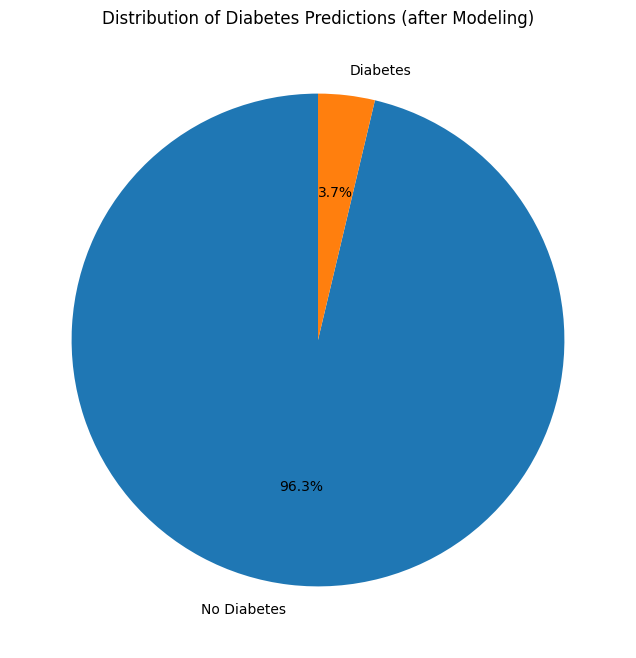

In [29]:
label_counts = f_result['Predicted'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Predictions (after Modeling)')
plt.show()

In [30]:
f_result.head()

,True,Predicted
19908,0,0
15050,0,0
93214,0,0
90922,0,0
41748,0,0


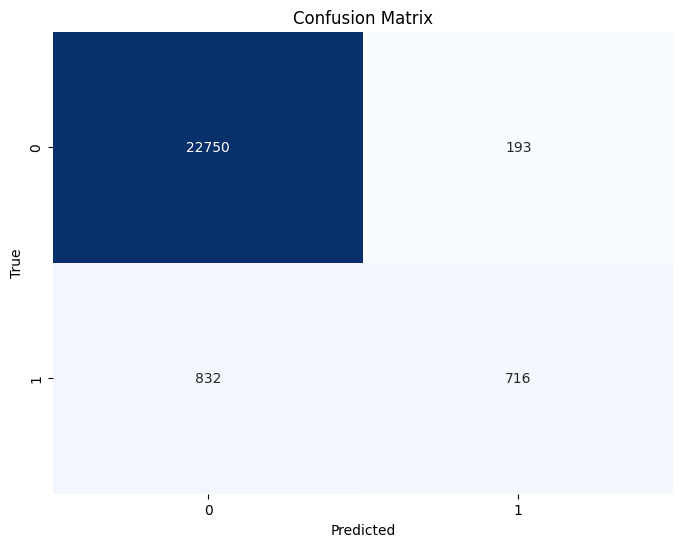

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9581
Precision: 0.7877
Recall: 0.4625
F1 Score: 0.5828


In [33]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print("R Squre = ",r_squared)

R Squre =  0.2931793611422805


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [35]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train) #8 - fit model
knn_predictions = knn_classifier.predict(X_test)

In [36]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [37]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f'KNN Accuracy: {knn_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Logistic Regresion Accuracy: {accuracy}')


KNN Accuracy: 0.9518190355640848
Random Forest Accuracy: 0.9693765056551387
Logistic Regresion Accuracy: 0.9581478910620228


In [38]:
def plot_confusion_matrix(y_true, y_pred , title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


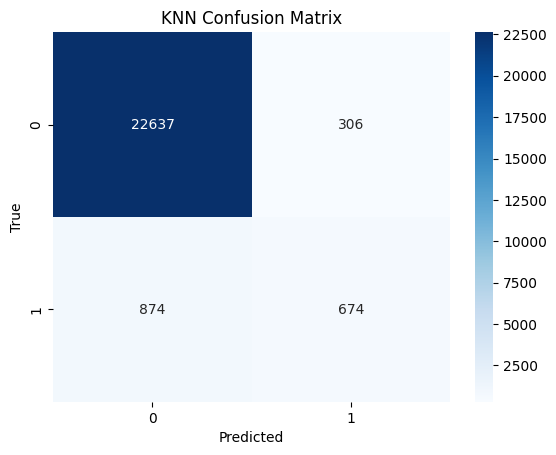

In [39]:
plot_confusion_matrix(y_test, knn_predictions ,'KNN Confusion Matrix')

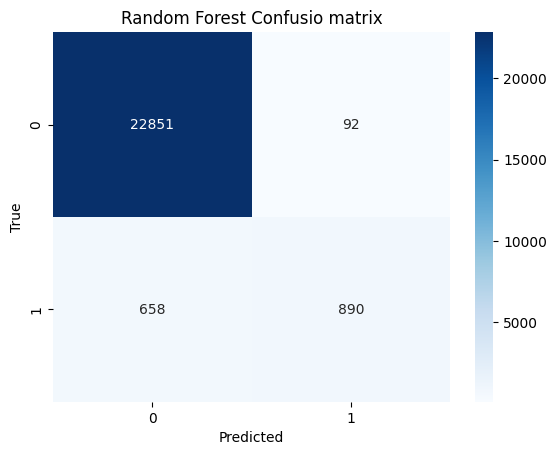

In [40]:
plot_confusion_matrix(y_test, rf_predictions,'Random Forest Confusio matrix')

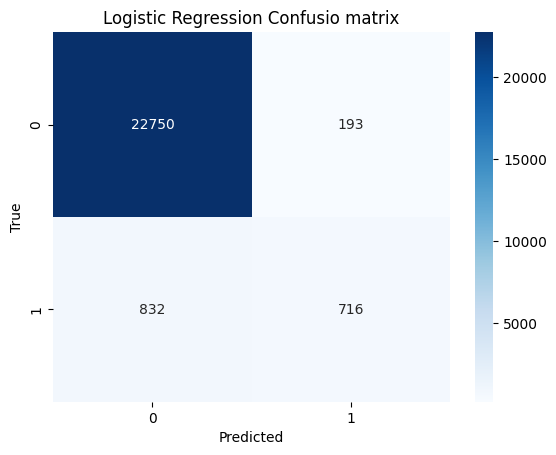

In [41]:
plot_confusion_matrix(y_test, y_pred,'Logistic Regression Confusio matrix')

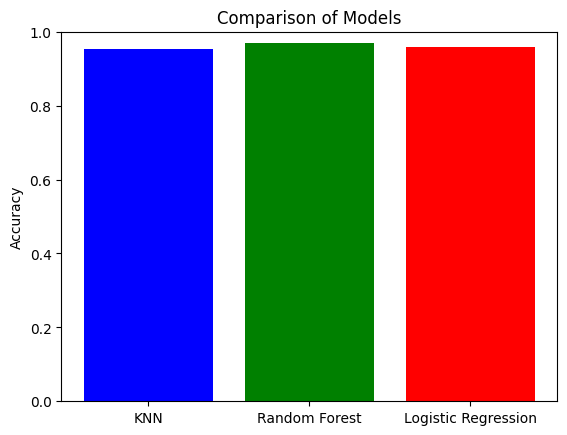

In [42]:
classifiers = ['KNN', 'Random Forest', 'Logistic Regression']
accuracies = [knn_accuracy, rf_accuracy ,accuracy]

plt.bar(classifiers, accuracies, color=['blue', 'green' ,'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Models')
plt.show()